<a href="https://colab.research.google.com/github/subhashpolisetti/Dimensionality_Reduction/blob/main/Dimensionality_Reduction_Image_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dimensionality Reduction and Manifold Learning Techniques

In this notebook, we explore various dimensionality reduction and manifold learning techniques using two well-known datasets: **Digits** and **Olivetti Faces**.

## Techniques Covered:
1. **Randomized PCA**: Principal Component Analysis using a randomized solver for large datasets.
2. **Kernel PCA**: A nonlinear version of PCA that uses the Radial Basis Function (RBF) kernel to capture complex structures in the data.
3. **Incremental PCA**: A variant of PCA that performs dimensionality reduction in mini-batches, ideal for large datasets.
4. **Locally Linear Embedding (LLE)**: A manifold learning technique that preserves local neighborhood structures.
5. **t-SNE**: A technique for visualizing high-dimensional data by mapping it into lower dimensions while maintaining the local structure.
6. **UMAP**: A powerful method for dimensionality reduction that preserves both local and global structures of the data.
7. **ISOMAP**: A non-linear dimensionality reduction method that models geodesic distances across a manifold.
8. **MDS (Multidimensional Scaling)**: A method that aims to place objects in a low-dimensional space while preserving pairwise distances between them.
9. **Factor Analysis**: A statistical method used to model latent variables that explain observed correlations.
10. **Autoencoder**: A neural network architecture for unsupervised learning where an encoder maps input to a lower-dimensional space, and a decoder reconstructs the input.

## Datasets:
1. **Digits Dataset**: A dataset of handwritten digits, each with 64 features (8x8 pixel images).
2. **Olivetti Faces Dataset**: A dataset containing 400 face images, each with 64 features (8x8 pixel images).

## Visualizations:
Each technique is applied to the **Digits Dataset** and **Olivetti Faces Dataset**, and the results are visualized in 2D. We use `matplotlib` to plot the transformed data and observe how each technique reveals different aspects of the dataset's structure.

## Key Observations:
- **Randomized PCA** and **Incremental PCA** show how linear methods can reduce dimensionality while maintaining most of the data's variance.
- **Kernel PCA** and **LLE** provide insights into non-linear structures in the data.
- **t-SNE**, **UMAP**, and **ISOMAP** are effective for visualizing complex, high-dimensional data by mapping it into lower dimensions.
- **Autoencoder** leverages neural networks for dimensionality reduction and is trained directly on the dataset.

## Code Walkthrough:
Each technique is implemented step-by-step, and results are displayed visually with color-coded labels corresponding to the dataset's target values. This allows us to compare how different methods preserve the structure of the data.


In [1]:


!pip install umap-learn tensorflow matplotlib seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.3 MB/s eta 0:00:00


In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_olivetti_faces, load_digits
from sklearn.decomposition import PCA, KernelPCA, IncrementalPCA, FactorAnalysis
from sklearn.manifold import TSNE, Isomap, LocallyLinearEmbedding, MDS
from sklearn.preprocessing import StandardScaler
import umap
from keras.layers import Input, Dense
from keras.models import Model

In [3]:
# Set up visualization function
def plot_embedding(data, target, title):
    # Create a new figure with a specific size (8x6 inches)
    plt.figure(figsize=(8, 6))

    # Create a scatter plot using the first two dimensions of the data
    # 'data[:, 0]' represents the first dimension (x-axis) and 'data[:, 1]' represents the second dimension (y-axis)
    # 'c=target' ensures that the points are colored based on their corresponding target class
    # 'cmap="viridis"' sets the color map to "viridis", which is a visually pleasant colormap
    # 'alpha=0.7' makes the points slightly transparent for better visualization of overlapping points
    scatter = plt.scatter(data[:, 0], data[:, 1], c=target, cmap="viridis", alpha=0.7)

    # Add a colorbar to the plot to indicate what the colors represent
    plt.colorbar(scatter)

    # Set the title of the plot to the provided title argument
    plt.title(title)

    # Display the plot
    plt.show()


downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


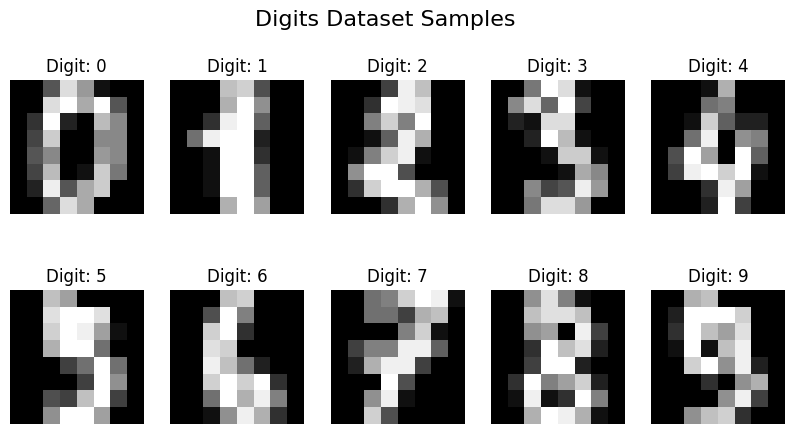

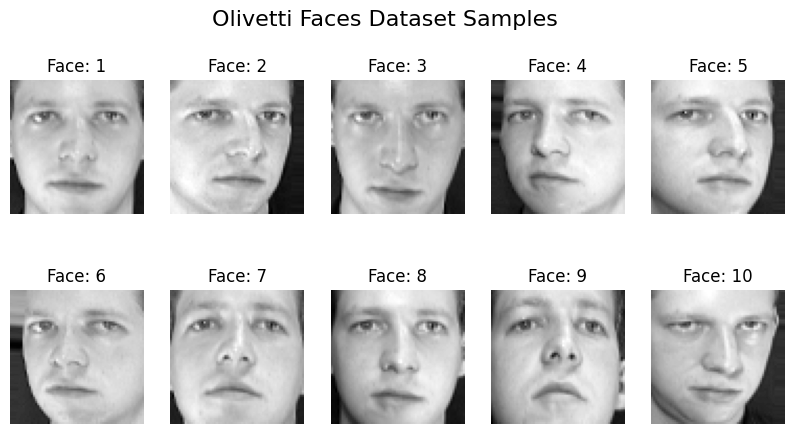

In [4]:
# Load image datasets
digits = load_digits()  # Load the digits dataset (8x8 pixel images of handwritten digits)
olivetti_faces = fetch_olivetti_faces()  # Load the Olivetti faces dataset (64x64 pixel images of faces)

# Visualize the first few images of the digits dataset
plt.figure(figsize=(10, 5))  # Set the figure size to 10 inches by 5 inches
for i in range(10):  # Loop through the first 10 images
    plt.subplot(2, 5, i + 1)  # Create a 2x5 grid of subplots and place the current image
    plt.imshow(digits.images[i], cmap='gray')  # Display the image in grayscale
    plt.title(f"Digit: {digits.target[i]}")  # Add a title with the corresponding digit label
    plt.axis('off')  # Turn off axis labels and ticks for a cleaner image
plt.suptitle("Digits Dataset Samples", fontsize=16)  # Add a main title for the digits dataset visualization
plt.show()  # Display the visualization

# Visualize the first few images of the Olivetti faces dataset
plt.figure(figsize=(10, 5))  # Set the figure size to 10 inches by 5 inches
for i in range(10):  # Loop through the first 10 images
    plt.subplot(2, 5, i + 1)  # Create a 2x5 grid of subplots and place the current image
    plt.imshow(olivetti_faces.images[i], cmap='gray')  # Display the image in grayscale
    plt.title(f"Face: {i+1}")  # Add a title with the index of the face (1-based)
    plt.axis('off')  # Turn off axis labels and ticks for a cleaner image
plt.suptitle("Olivetti Faces Dataset Samples", fontsize=16)  # Add a main title for the faces dataset visualization
plt.show()  # Display the visualization


In [5]:
# Preprocess data
# Standardize the digits dataset by scaling each feature to have zero mean and unit variance
# This ensures that all features are on the same scale, which is important for most machine learning algorithms
digits_data = StandardScaler().fit_transform(digits.data)

# Standardize the Olivetti faces dataset in the same way
# This helps the algorithm to treat all features equally by removing any bias due to varying scales
faces_data = StandardScaler().fit_transform(olivetti_faces.data)


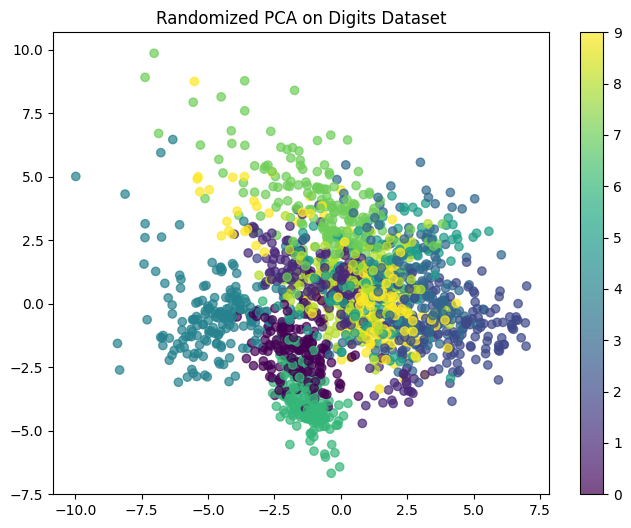

In [6]:
# 1. Randomized PCA
pca = PCA(n_components=2, svd_solver='randomized')
digits_pca = pca.fit_transform(digits_data)
plot_embedding(digits_pca, digits.target, "Randomized PCA on Digits Dataset")

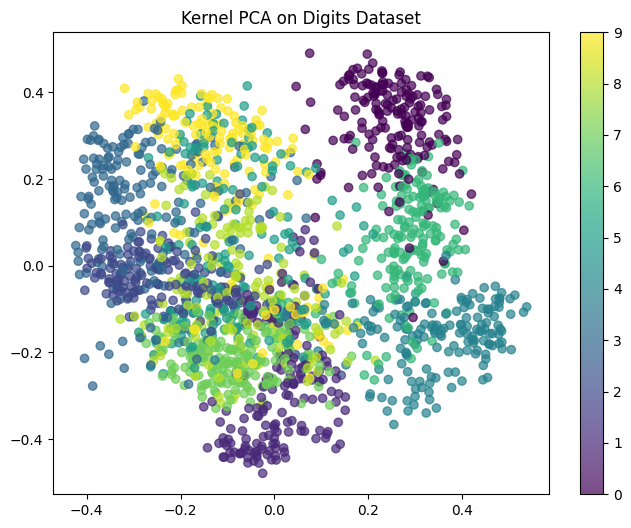

In [7]:
# 2. Kernel PCA
# Kernel PCA is a non-linear dimensionality reduction technique that uses a kernel function (in this case, RBF) to map the data into a higher-dimensional space
# where linear techniques like PCA can be applied. This allows Kernel PCA to capture more complex patterns in the data.

# Initialize the KernelPCA object with the following parameters:
# n_components=2: We want to reduce the data to 2 dimensions for visualization purposes.
# kernel='rbf': We use the Radial Basis Function (RBF) kernel to capture complex, non-linear relationships in the data.
# gamma=0.01: Controls the shape of the RBF kernel. A lower gamma value creates a wider Gaussian kernel, which can help to avoid overfitting.
kernel_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.01)

# Fit the KernelPCA model to the digits data and transform it into a 2D space.
# The result, digits_kpca, contains the transformed data, which is now reduced to 2 dimensions.
digits_kpca = kernel_pca.fit_transform(digits_data)

# Visualize the transformed digits data in 2D using the plot_embedding function
# The target values (digits.target) are passed to color-code the points in the plot according to their actual digit class.
plot_embedding(digits_kpca, digits.target, "Kernel PCA on Digits Dataset")


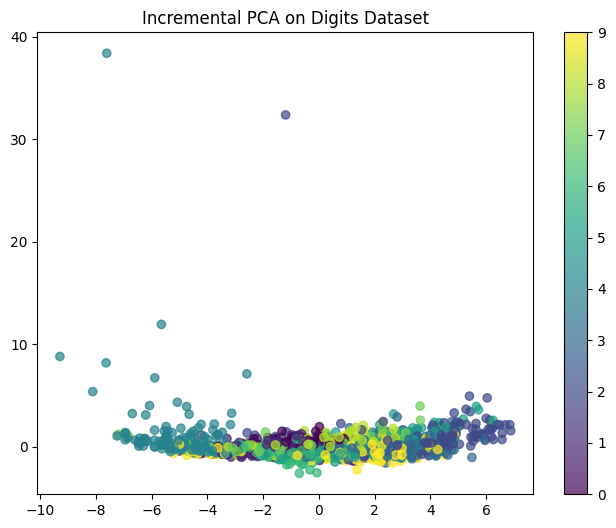

In [8]:
# 3. Incremental PCA
# Incremental PCA is a variant of PCA that is designed to handle large datasets by processing them in mini-batches (instead of all data at once).
# This approach is particularly useful when the dataset is too large to fit into memory.

# Initialize the IncrementalPCA object with the following parameters:
# n_components=2: We want to reduce the data to 2 dimensions for visualization purposes.
# batch_size=10: The data will be processed in mini-batches of size 10. This is helpful when working with large datasets.
incremental_pca = IncrementalPCA(n_components=2, batch_size=10)

# Fit the IncrementalPCA model to the digits data and transform it into a 2D space.
# The result, digits_ipca, contains the transformed data, which is now reduced to 2 dimensions.
digits_ipca = incremental_pca.fit_transform(digits_data)

# Visualize the transformed digits data in 2D using the plot_embedding function
# The target values (digits.target) are passed to color-code the points in the plot according to their actual digit class.
plot_embedding(digits_ipca, digits.target, "Incremental PCA on Digits Dataset")


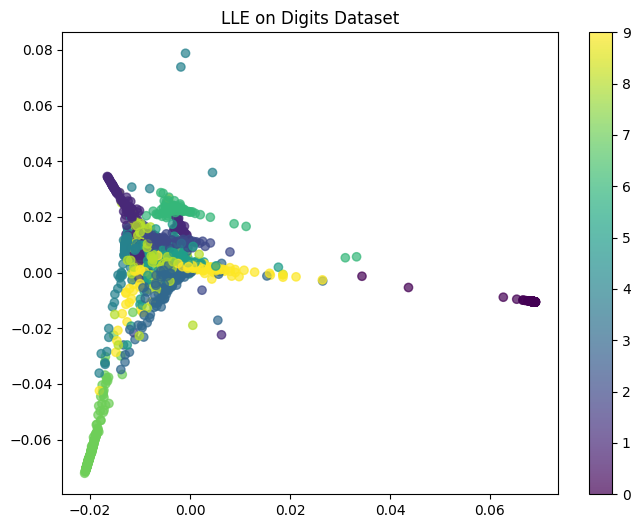

In [9]:
# 4. Locally Linear Embedding (LLE)
# Locally Linear Embedding (LLE) is a non-linear dimensionality reduction technique that preserves local neighborhood information.
# It attempts to find a lower-dimensional representation of the data while keeping the local relationships between data points intact.

# Initialize the LocallyLinearEmbedding object with the following parameters:
# n_components=2: We want to reduce the data to 2 dimensions for visualization purposes.
# n_neighbors=10: This defines the number of neighbors used to compute the local geometry for each point.
# A smaller value of n_neighbors captures more local structure, while a larger value captures broader global structure.
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)

# Fit the LLE model to the digits data and transform it into a 2D space.
# The result, digits_lle, contains the transformed data, which is now reduced to 2 dimensions.
digits_lle = lle.fit_transform(digits_data)

# Visualize the transformed digits data in 2D using the plot_embedding function
# The target values (digits.target) are passed to color-code the points in the plot according to their actual digit class.
plot_embedding(digits_lle, digits.target, "LLE on Digits Dataset")


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


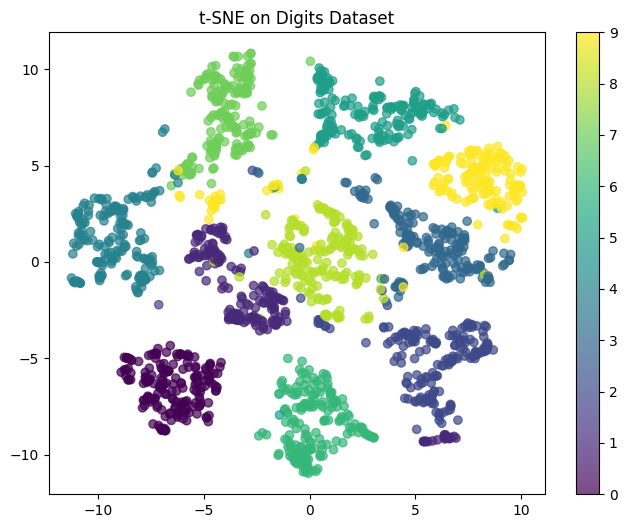

In [10]:
# 5. t-SNE
# t-SNE (t-Distributed Stochastic Neighbor Embedding) is a non-linear dimensionality reduction technique
# that is particularly well-suited for the visualization of high-dimensional datasets in 2 or 3 dimensions.
# It works by converting pairwise similarities of data points to joint probabilities and then minimizing the
# divergence between the original and low-dimensional pairwise probability distributions.

# Initialize the t-SNE object with the following parameters:
# n_components=2: We aim to reduce the data to 2 dimensions for visualization.
# perplexity=30: A parameter that affects the balance between local and global aspects of the data.
# Higher values of perplexity consider a larger neighborhood of points when calculating probabilities.
# n_iter=300: The number of iterations for optimization. More iterations generally lead to better results.
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)

# Fit the t-SNE model to the digits data and transform it into a 2D space.
# The result, digits_tsne, contains the transformed data, which is now reduced to 2 dimensions.
digits_tsne = tsne.fit_transform(digits_data)

# Visualize the transformed digits data in 2D using the plot_embedding function
# The target values (digits.target) are passed to color-code the points in the plot according to their actual digit class.
plot_embedding(digits_tsne, digits.target, "t-SNE on Digits Dataset")


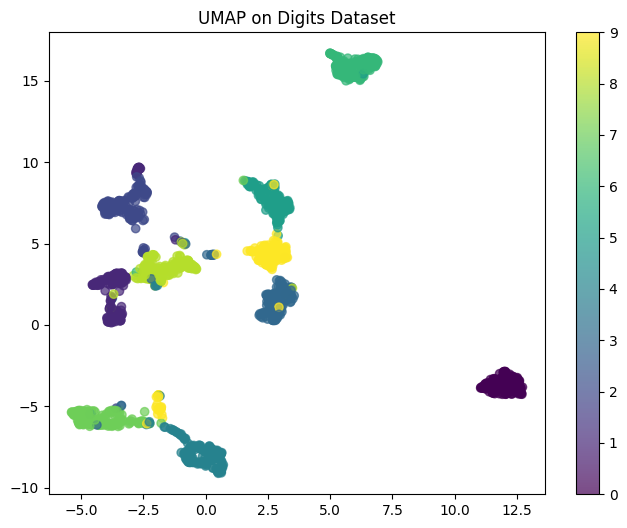

In [11]:
# 6. UMAP
umap_reducer = umap.UMAP(n_components=2)
digits_umap = umap_reducer.fit_transform(digits_data)
plot_embedding(digits_umap, digits.target, "UMAP on Digits Dataset")


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 3 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


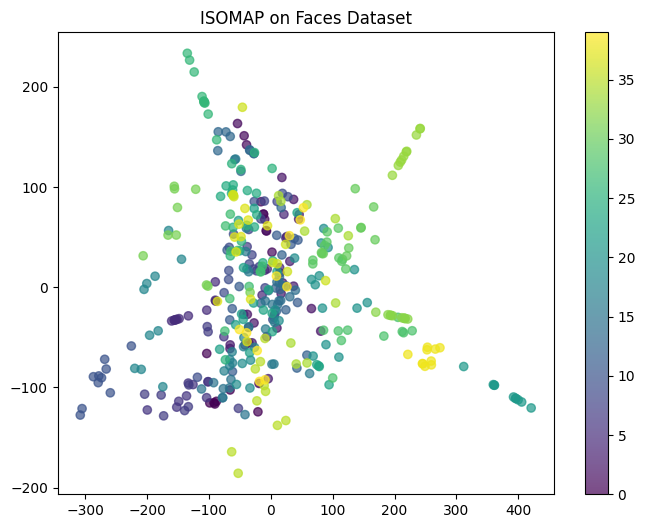

In [12]:
# 7. ISOMAP
# ISOMAP (Isometric Mapping) is a non-linear dimensionality reduction technique that extends classical Multidimensional Scaling (MDS).
# It works by modeling the global geometry of the data through geodesic distances (distances along the manifold),
# which can capture complex relationships that linear methods like PCA cannot.

# Initialize the Isomap object with the following parameters:
# n_components=2: We aim to reduce the data to 2 dimensions for visualization purposes.
isomap = Isomap(n_components=2)

# Fit the ISOMAP model to the faces data and transform it into a 2D space.
# The result, faces_isomap, contains the transformed data, which is now reduced to 2 dimensions.
faces_isomap = isomap.fit_transform(faces_data)

# Visualize the transformed faces data in 2D using the plot_embedding function
# The target values (olivetti_faces.target) are passed to color-code the points in the plot according to their face identities.
plot_embedding(faces_isomap, olivetti_faces.target, "ISOMAP on Faces Dataset")


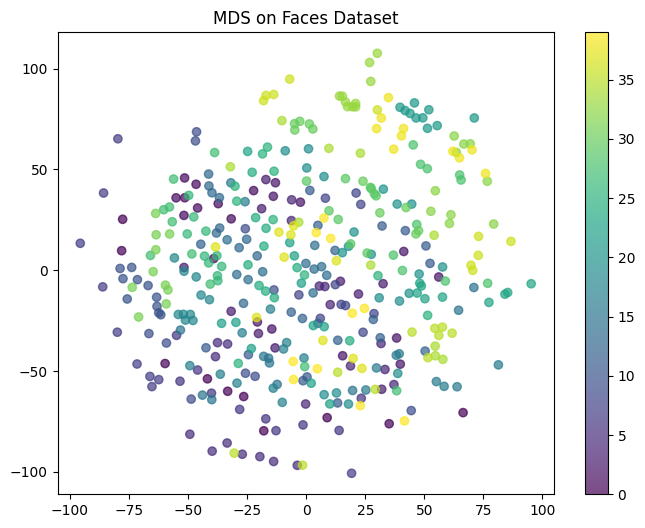

In [13]:
# 8. MDS
# Multidimensional Scaling (MDS) is a non-linear dimensionality reduction technique that aims to preserve the pairwise distances between points in the reduced-dimensional space.
# MDS tries to maintain the relative distances between data points as they are transformed into a lower-dimensional representation.

# Initialize the MDS object with the following parameters:
# n_components=2: We want to reduce the data to 2 dimensions for visualization purposes.
# random_state=42: Ensures reproducibility of the results by setting a random seed.
mds = MDS(n_components=2, random_state=42)

# Fit the MDS model to the faces data and transform it into a 2D space.
# The result, faces_mds, contains the transformed data, which is now reduced to 2 dimensions.
faces_mds = mds.fit_transform(faces_data)

# Visualize the transformed faces data in 2D using the plot_embedding function
# The target values (olivetti_faces.target) are passed to color-code the points in the plot according to their face identities.
plot_embedding(faces_mds, olivetti_faces.target, "MDS on Faces Dataset")


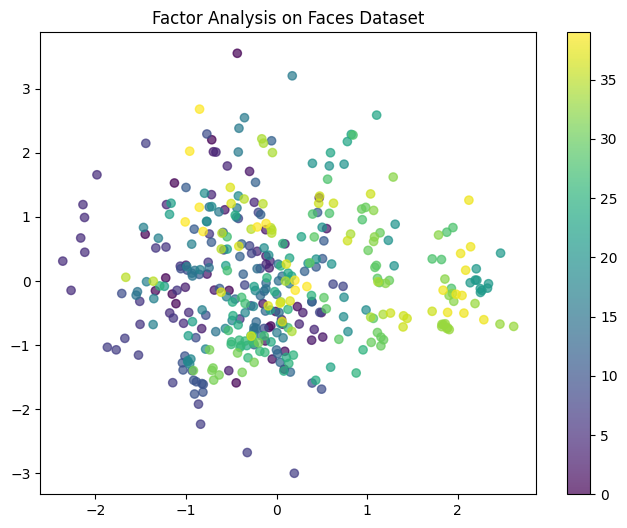

In [14]:
# 9. Factor Analysis
# Factor Analysis is a statistical method used to model observed variables in terms of latent (unobserved) variables (factors).
# It attempts to explain the variance-covariance structure of the data by identifying underlying factors that influence the observed variables.
# Factor Analysis is typically used to reduce the dimensionality of the data while keeping the most important structure of the data intact.

# Initialize the FactorAnalysis object with the following parameters:
# n_components=2: We want to reduce the data to 2 dimensions for visualization purposes.
factor_analysis = FactorAnalysis(n_components=2)

# Fit the FactorAnalysis model to the faces data and transform it into a 2D space.
# The result, faces_fa, contains the transformed data, which is now reduced to 2 dimensions.
faces_fa = factor_analysis.fit_transform(faces_data)

# Visualize the transformed faces data in 2D using the plot_embedding function
# The target values (olivetti_faces.target) are passed to color-code the points in the plot according to their face identities.
plot_embedding(faces_fa, olivetti_faces.target, "Factor Analysis on Faces Dataset")


57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


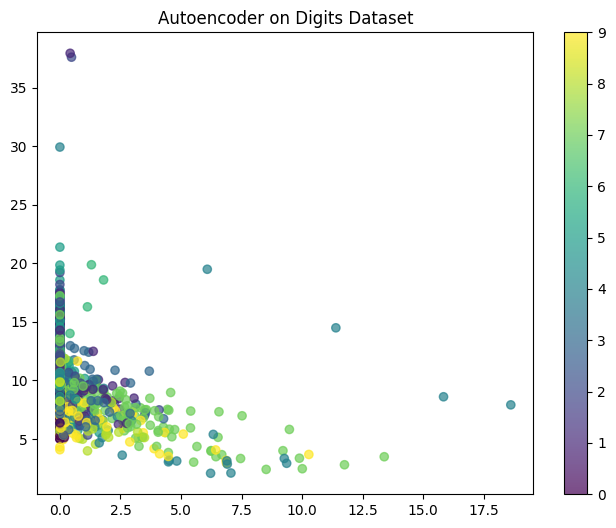

In [16]:

# 10. Autoencoder
input_dim = digits_data.shape[1]
input_layer = Input(shape=(input_dim,))
encoder = Dense(64, activation='relu')(input_layer)
encoder = Dense(32, activation='relu')(encoder)
encoder = Dense(2, activation='relu')(encoder)
decoder = Dense(32, activation='relu')(encoder)
decoder = Dense(64, activation='relu')(decoder)
decoder = Dense(input_dim, activation='sigmoid')(decoder)
autoencoder = Model(input_layer, decoder)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(digits_data, digits_data, epochs=10, batch_size=256, verbose=0)
encoder_model = Model(input_layer, encoder)
digits_autoencoded = encoder_model.predict(digits_data)
plot_embedding(digits_autoencoded, digits.target, "Autoencoder on Digits Dataset")